In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import probplot

In [2]:
import bnlearn as bn

In [3]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [4]:
df = full_df
df = full_df[['rev_Mean', 'ovrrev_Mean', 'avgrev', 'totmrc_Mean', 'ovrmou_Mean', 'mou_Mean', 'roam_Mean', 'drop_vce_Mean', 'phones', 'change_mou']].dropna()

In [5]:
def accept_reject_sampling(n, f, dist, M):
    res = []
    while len(res) < n:
        x = dist.rvs()
        p_accept = f(x) / (M * dist.pdf(x))
        if np.random.random() < p_accept:
            res.append(x)
    return res

KstestResult(statistic=0.035121924098593604, pvalue=0.16974949326138178)


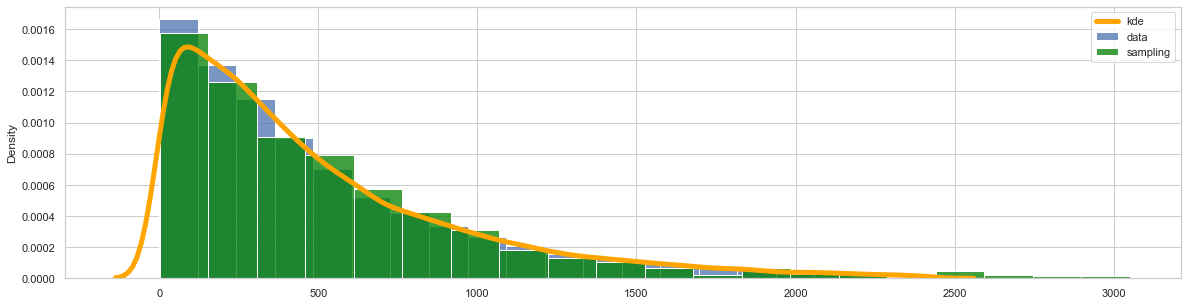

KstestResult(statistic=0.03986751230360562, pvalue=0.08366222225009778)


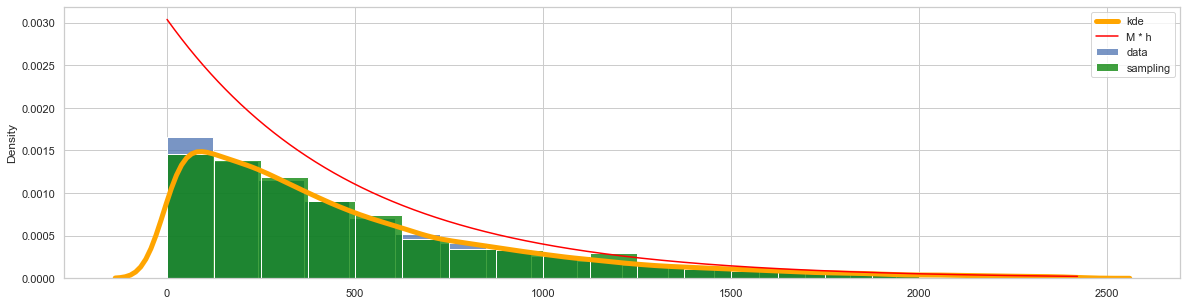

In [6]:
from scipy.stats import gaussian_kde, trimboth, expon, kstest
sns.set(font_scale=1, style='whitegrid')

data = trimboth(df['mou_Mean'].to_numpy(), 0.01)
kde = gaussian_kde(data)
tiks = np.arange(data.min(), data.max() + 1, (data.max() + 1 - data.min()) / 1000)
p = expon.fit(data)

f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, bins=20, stat="density", ax=ax, label='data')
sns.kdeplot(data, ax=ax, color='orange', linewidth=5, label='kde')

sample = [expon(*p).ppf(np.random.random()) for _ in range(1000)]
print(kstest(data, sample))
sns.histplot(data=sample, bins=20, stat="density", ax=ax, label='sampling', color='green')
plt.legend()
plt.show()

f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, bins=20, stat="density", ax=ax, label='data')
sns.kdeplot(data, ax=ax, color='orange', linewidth=5, label='kde')
M = 1.5
sample = accept_reject_sampling(1000, kde, expon(*p), M)
print(kstest(data, sample))

sns.lineplot(x=tiks, y=[expon(*p).pdf(x) * M for x in tiks], label='M * h', color='red', ax=ax)
sns.histplot(data=sample, bins=20, stat="density", ax=ax, label='sampling', color='green')
plt.legend()
plt.show()

KstestResult(statistic=0.043529720397318394, pvalue=0.04574734358438415)


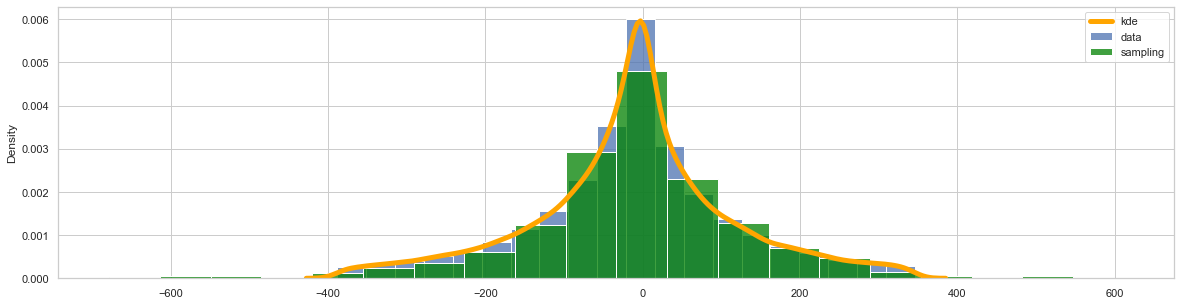

KstestResult(statistic=0.02545498777999511, pvalue=0.5348070378002099)


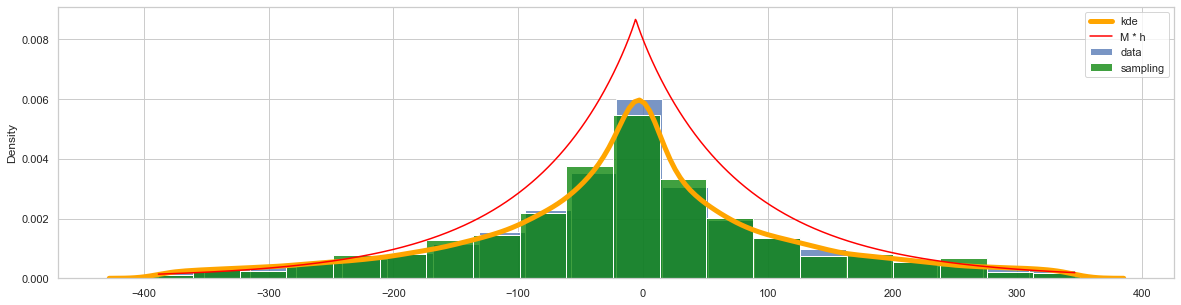

In [7]:
from scipy.stats import gennorm

data = trimboth(df['change_mou'].to_numpy(), 0.05)
kde = gaussian_kde(data)
tiks = np.arange(data.min(), data.max() + 1, (data.max() + 1 - data.min()) / 1000)
p = gennorm.fit(data)

f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, bins=20, stat="density", ax=ax, label='data')
sns.kdeplot(data, ax=ax, color='orange', linewidth=5, label='kde')

sample = [gennorm(*p).ppf(np.random.random()) for _ in range(1000)]
print(kstest(data, sample))
sns.histplot(data=sample, bins=20, stat="density", ax=ax, label='sampling', color='green')
plt.legend()
plt.show()

f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, bins=20, stat="density", ax=ax, label='data')
sns.kdeplot(data, ax=ax, color='orange', linewidth=5, label='kde')
M = 1.5
sample = accept_reject_sampling(1000, kde, gennorm(*p), M)
print(kstest(data, sample))

sns.lineplot(x=tiks, y=[gennorm(*p).pdf(x) * M for x in tiks], label='M * h', color='red', ax=ax)
sns.histplot(data=sample, bins=20, stat="density", ax=ax, label='sampling', color='green')
plt.legend()
plt.show()

<AxesSubplot:>

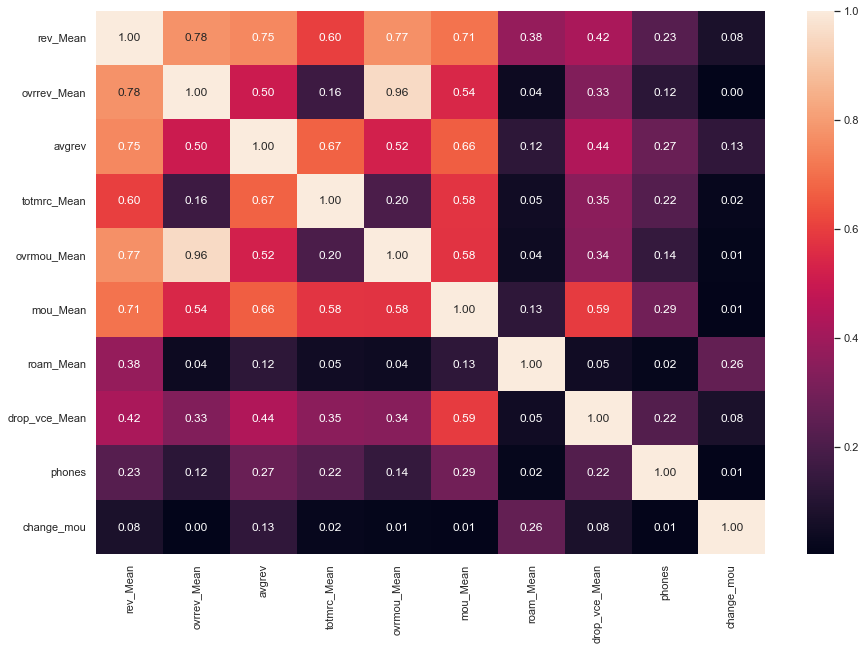

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df.corr()), annot=True, fmt='.2f')

In [9]:
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder
ordinal = OrdinalEncoder()
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data = ordinal.fit_transform(df)
data = kbins.fit_transform(data)
data = pd.DataFrame(data, columns=df.columns)
data

,rev_Mean,ovrrev_Mean,avgrev,totmrc_Mean,ovrmou_Mean,mou_Mean,roam_Mean,drop_vce_Mean,phones,change_mou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
99103,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
99104,3.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0
99105,2.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,2.0
99106,4.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0


In [10]:
DAG = bn.structure_learning.fit(data, 'hillclimbsearch')
res = bn.plot(DAG, interactive=True)

[bnlearn] >Computing best DAG using [hillclimbsearch]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


In [11]:
model_mle = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of rev_Mean:
+---------------+-----+----------------------+
| avgrev        | ... | avgrev(4.0)          |
+---------------+-----+----------------------+
| rev_Mean(0.0) | ... | 0.020149047750483026 |
+---------------+-----+----------------------+
| rev_Mean(1.0) | ... | 0.02925752139111234  |
+---------------+-----+----------------------+
| rev_Mean(2.0) | ... | 0.05437482749102953  |
+---------------+-----+----------------------+
| rev_Mean(3.0) | ... | 0.14849572177753242  |
+---------------+-----+----------------------+
| rev_Mean(4.0) | ... | 0.7477228815898427   |
+---------------+-----+----------------------+
[bnlearn] >CPD of ovrrev_Mean:
+------------------+-----+---------------------+
| rev_Mean         | ... | rev_Mean(4.0)       |
+------------------+-----+---------------------+
| totmrc_Mean      | ... | totmrc_Mean(4.0)    |
+-----

In [12]:
Xtest = bn.sampling(model_mle, n=1000)

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/10 [00:00<?, ?it/s]

KstestResult(statistic=1.0, pvalue=0.0)


<AxesSubplot:xlabel='rev_Mean', ylabel='Density'>

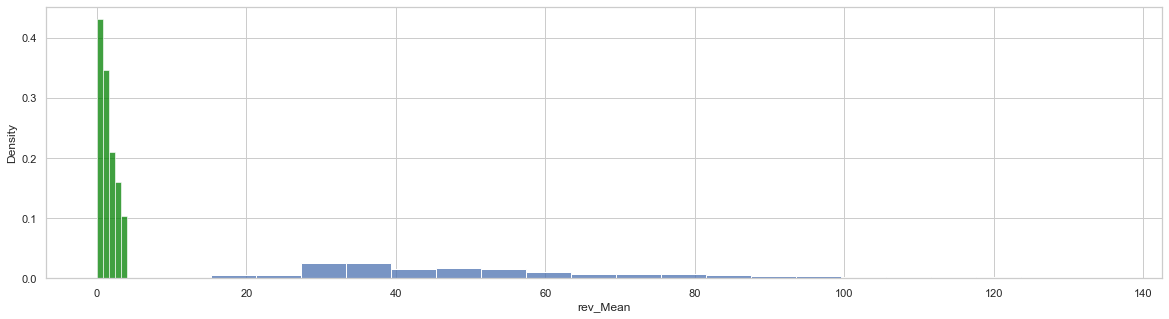

In [19]:
data = trimboth(df['rev_Mean'].to_numpy(), 0.05)

print(kstest(data, Xtest['rev_Mean']))

f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, bins=20, stat="density", ax=ax, label='data')
sns.histplot(data=Xtest['rev_Mean'], bins=5, stat="density", ax=ax, label='sampling', color='green')